In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df = pd.read_csv("Housing.csv") 

In [5]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [7]:
X = df_encoded.drop("price", axis=1)
y = df_encoded["price"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)


In [25]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [27]:
y_pred = model.predict(X_test)

In [29]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(" Model Evaluation:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

 Model Evaluation:
Mean Absolute Error (MAE): 970043.403920164
Mean Squared Error (MSE): 1754318687330.6643
R-squared (R²): 0.6529242642153184


In [31]:
print("\n Model Coefficients:")
print("Intercept:", model.intercept_)
coefficients = pd.Series(model.coef_, index=X.columns)
print(coefficients)


 Model Coefficients:
Intercept: 260032.35760741401
area                               2.359688e+02
bedrooms                           7.677870e+04
bathrooms                          1.094445e+06
stories                            4.074766e+05
parking                            2.248419e+05
mainroad_yes                       3.679199e+05
guestroom_yes                      2.316100e+05
basement_yes                       3.902512e+05
hotwaterheating_yes                6.846499e+05
airconditioning_yes                7.914267e+05
prefarea_yes                       6.298906e+05
furnishingstatus_semi-furnished   -1.268818e+05
furnishingstatus_unfurnished      -4.136451e+05
dtype: float64


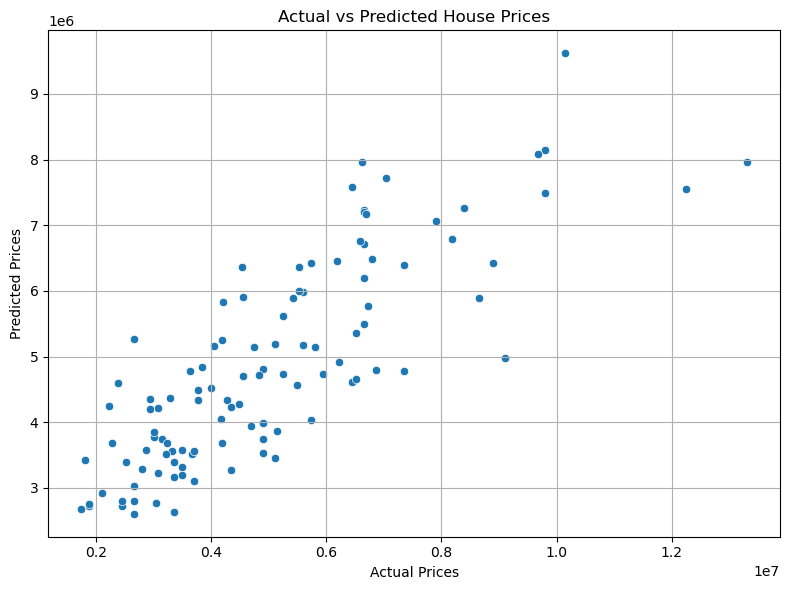

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()